Install Required Libraries

In [ ]:
!pip install pandas numpy matplotlib scikit-learn tensorflow keras


# **Data Acquisition:**
Get the stock data used for training the LSTM Modelfrom Yahoo Finance as a reliable source for historical financial data. yfinance library provides a user-friendly way to download data from Yahoo Finance in Python. It offers features like multithreading for faster downloads.

**Install yfinance:**



In [ ]:
!pip install yfinance


Download stock data for IBM using yfinance

In [ ]:
# Import libraries
import yfinance as yf

# Download stock data (replace "IBM" with your desired ticker symbol)
stock_data = yf.download("IBM", period="1y")

# Print the first 5 rows of the data
print(stock_data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-17  128.300003  128.720001  126.800003  127.820000  122.154251   
2023-04-18  128.139999  128.679993  127.349998  127.779999  122.116028   
2023-04-19  126.500000  126.980003  125.300003  126.320000  120.720734   
2023-04-20  130.149994  130.979996  125.839996  126.360001  120.758965   
2023-04-21  126.000000  126.699997  125.269997  125.730003  120.156898   

             Volume  
Date                 
2023-04-17  3662700  
2023-04-18  3193800  
2023-04-19  7014400  
2023-04-20  9749600  
2023-04-21  6725400  


# **Splitting Data into Training and Testing Sets:**

The training set will be used to train the LSTM model, and the testing set will be used to evaluate its performance on unseen data.A common split ratio is 80% for training and 20% for testing.

In [ ]:
# Split data into training and testing sets (e.g., 80% training, 20% testing)
split_ratio = 0.8
train_size = int(len(stock_data) * split_ratio)

train_data, test_data = stock_data[:train_size], stock_data[train_size:]


# **Preparing Data for LSTM Model:**
LSTMs require specific data formatting.


*   **Create sequences:** LSTMs learn patterns by looking at a sequence of past data points. We need to create sequences (e.g., windows) of past closing prices (or other features) for the model to train on.
*   **Reshape data:** The data needs to be reshaped into a specific format for the LSTM model. This typically involves adding an extra dimension to represent the sequence length.



In [ ]:
!pip install numpy
import numpy as np

# Define the number of past data points to look back (sequence length)
look_back = 5

# Create sequences for training data
train_sequences = []
for i in range(look_back, len(train_data)):
  # Select the closing price (assuming column index 0) for the sequence
  train_sequences.append(train_data.iloc[i-look_back:i, 0])  # Access using iloc for clarity

# Reshape training data for LSTM
train_sequences = np.array(train_sequences)
train_sequences = np.reshape(train_sequences, (train_sequences.shape[0], train_sequences.shape[1], 1))  # Add dimension for sequence

# Create sequences for testing data
test_sequences = []
for i in range(look_back, len(test_data)):
  # Select the closing price (assuming column index 0) for the sequence
  test_sequences.append(test_data.iloc[i-look_back:i, 0])  # Access using iloc for clarity

# Reshape testing data for LSTM
test_sequences = np.array(test_sequences)
test_sequences = np.reshape(test_sequences, (test_sequences.shape[0], test_sequences.shape[1], 1))  # Add dimension for sequence



In [ ]:
!pip install pandas numpy


In [ ]:
import pandas as pd
import numpy as np

**Define the LSTM Model Architecture:**

*   We use a library like Keras or TensorFlow to create the sequential model.
*   Defining the layers and units of LSTM model:We start with LSTM layer followed by additional layers(e.g., Dense) depending on our model's complexity. The number of units in each layer determines the model's capacity to learn patterns. We experiment with different configurations to find the optimal architecture for your data.










In [ ]:
!pip install tensorflow
import tensorflow as tf

print(tf.__version__)



In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming train_sequences is created elsewhere
print(f"Shape of train_sequences: {train_sequences.shape}")  # Check the shape

if len(train_sequences.shape) >= 2:  # Ensure at least 2 dimensions (samples, timesteps)
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(train_sequences.shape[1], 1)))  # First LSTM layer
    model.add(LSTM(50))                                                                      # Second LSTM layer
    model.add(Dense(1))
else:
    print("Error: train_sequences has an invalid shape. Please check its data structure.")

Shape of train_sequences: (196, 5, 1)


**Compile the Model:** Specify the losss function (e.g., mean squared error for stock prices) and optimizer (e.g., Adam) to guide the model's training process.

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()
# Add your layers here
model.compile(loss="mse", optimizer="adam")

**Train the Model:** Train the model on the prepared training sequences (train_sequences).The number of epochs(iterations overr the data) and batch size(number of samples per training step) to adjust the training process are specified.


*** Evaluate the Model:*** Use the testing sequences (test_sequences) to evaluate the model's performance on unseen data. Metrics like mean squared error or mean absolute error to assess how well the model generalizes to new data are calculated.



In [ ]:
!pip install pandas
!pip install numpy

Epoch 1/100
424/424 [==============================] - 11s 21ms/step - loss: 11595.8525
Epoch 2/100
424/424 [==============================] - 8s 19ms/step - loss: 8590.9521
Epoch 3/100
424/424 [==============================] - 9s 21ms/step - loss: 6408.5586
Epoch 4/100
424/424 [==============================] - 9s 21ms/step - loss: 4589.1582
Epoch 5/100
424/424 [==============================] - 8s 19ms/step - loss: 3209.4883
Epoch 6/100
424/424 [==============================] - 9s 21ms/step - loss: 2159.6042
Epoch 7/100
424/424 [==============================] - 9s 21ms/step - loss: 1381.4801
Epoch 8/100
424/424 [==============================] - 8s 19ms/step - loss: 828.4767
Epoch 9/100
424/424 [==============================] - 9s 21ms/step - loss: 457.6917
Epoch 10/100
424/424 [==============================] - 9s 22ms/step - loss: 227.8817
Epoch 11/100
424/424 [==============================] - 9s 21ms/step - loss: 99.6998
Epoch 12/100
424/424 [==============================] -

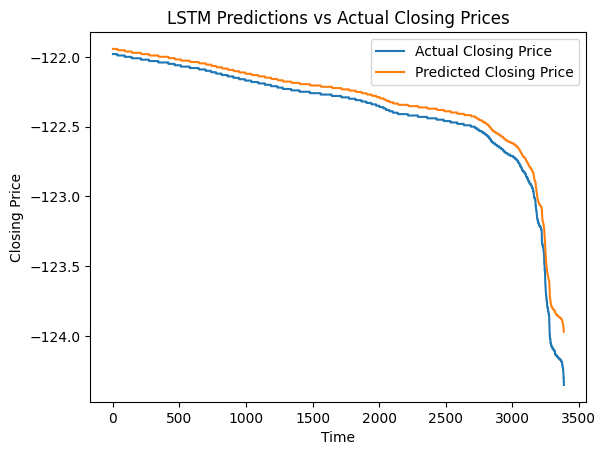

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame called 'data'
data = pd.read_csv("/content/california_housing_train.csv")


# Define parameters
look_back = 50  # Number of past data points to use for prediction
split_ratio = 0.8  # Ratio of data used for training

# Data preprocessing
closing_prices = data.iloc[:, 0]  # Assuming the first column contains closing prices

# Function to create sequences
def create_sequences(data, look_back):
    sequences = []
    for i in range(len(data) - look_back):
        x = data[i:(i + look_back)]  # Input sequence (look_back data points)
        y = data[i + look_back]      # Target value (next data point after the sequence)
        sequences.append((x, y))
    return sequences

# Create sequences
sequences = create_sequences(closing_prices, look_back)

# Split data into training and testing sets
split_index = int(len(sequences) * split_ratio)
train_sequences = sequences[:split_index]
test_sequences = sequences[split_index:]

# Prepare training data
X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1] for seq in train_sequences])

# Prepare testing data
X_test = np.array([seq[0] for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences])

# Reshape data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))

# Define and compile LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(look_back, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = 100
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model
predicted_prices = model.predict(X_test)
mse = mean_squared_error(y_test, predicted_prices)
print(f"Mean Squared Error (MSE) on testing data: {mse}")

# Optional visualization
plt.plot(y_test, label='Actual Closing Price')
plt.plot(predicted_prices, label='Predicted Closing Price')
plt.title('LSTM Predictions vs Actual Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


Downloading Data from Alpha-Vantage

In [ ]:
pip install alpha-vantage


In [ ]:
from alpha_vantage.timeseries import TimeSeries

# Replace with your API key
api_key = "5UKXMBI1FBATTABN"

# Define stock symbol and desired data range
symbol = "AAPL"  # Replace with the stock symbol you want to download
function = "TIME_SERIES_DAILY_ADJUSTED"  # Daily adjusted data
outputsize = "pandas"  # Request data in pandas format


In [ ]:
# Initialize TimeSeries object
ts = TimeSeries(key=api_key, output_format='pandas')


In [ ]:
# Get data (replace with error handling if needed)
data, _ = ts.get_daily(symbol, outputsize=outputsize)


In [ ]:
if data is not None:
  # Data retrieved successfully
  print("Data successfully downloaded from Alpha Vantage.")
  # Proceed with data processing here (next steps)
else:
  print("Error: Failed to retrieve data from Alpha Vantage.")
  # Handle the error (e.g., print error message, retry if possible)


Data successfully downloaded from Alpha Vantage.


**Error Handling**

In [ ]:
try:
  # Attempt to access 'Adj Close' column
  closing_prices = data['Adj Close']
except KeyError:
  print("Error: 'Adj Close' column not found in downloaded data.")
  # Handle the error (e.g., use a different column or download adjusted data)


Error: 'Adj Close' column not found in downloaded data.


**Data Exploration**

In [ ]:
# Explore downloaded data structure
print("Data Information:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Identify the relevant column (replace with your findings)
potential_column_names = ["4. close", "Close", "close"]  # Adjust based on Alpha Vantage documentation
correct_column_name = None

# Try potential column names
for col_name in potential_column_names:
  try:
    closing_prices = data[col_name]
    correct_column_name = col_name
    print(f"\nSuccessfully accessed closing prices using column: {col_name}")
    break  # Exit the loop if successful
  except KeyError:
    pass  # Do nothing if the column doesn't exist

# Handle case where no closing price column found
if correct_column_name is None:
  print("\nError: No column with closing prices found in downloaded data.")
  # Handle the error (consider alternative data source or function)



Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-04-16 to 2023-11-21
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB
None

First 5 Rows:
            1. open  2. high  3. low  4. close    5. volume
date                                                       
2024-04-16   171.70  173.755  168.27    169.38   72954058.0
2024-04-15   175.36  176.630  172.50    172.69   73531773.0
2024-04-12   174.26  178.360  174.21    176.55  101670886.0
2024-04-11   168.34  175.460  168.16    175.04   91070275.0
2024-04-10   168.80  169.090  167.11    167.78   49709336.0

Successfully accessed closing prices using column: 4. close


In [ ]:
closing_prices = data['4. close']


# **Error Handling for Accessing 'Adj Close' Column**
The following code snippet uses a try-except block to access the 'Adj Close' column from the data object. If the column does not exist, it catches the KeyError and prints an error message.

**Explanation:**

*   Purpose: Attempts to access the 'Adj Close' column from data.

*   Handling KeyErrors: Catches KeyError if the column does not exist.

*   Error Message: Displays a message if the column is not found.



In [ ]:
# ... data download and error handling (as before)

# Access closing prices
closing_prices = data['4. close']

# ... normalization/scaling (optional)

# Create sequences (replace with your sequence length and target definition)
def create_sequences(data, seq_length):
  sequences = []
  for i in range(len(data)-seq_length-1):
    # Define sequence and target
    sequence = data[i:i+seq_length]
    target = data[i+seq_length]
    sequences.append((sequence, target))
  return sequences

# Create sequences (replace 20 with your desired sequence length)
sequences = create_sequences(closing_prices, 20)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sequences, test_size=0.2, shuffle=True)

# ... build and train your LSTM model (your architecture and training code)

# ... evaluate and visualize the model (as before)


# **Define the LSTM Model Architecture:**

Use libraries like TensorFlow or Keras to define the architecture of your LSTM model. Key components include:
**Input layer:** This layer receives the sequences of closing prices as input. The size of this layer should match the length of your sequences (e.g., 20 in your code).
**LSTM layers:** You can stack multiple LSTM layers to capture complex temporal dependencies in the data. Experiment with the number of layers and units per layer (number of internal processing units).
**Output layer:** This layer predicts the target value (e.g., the closing price of the next day). The size of this layer depends on your prediction task (typically 1 unit for single-step prediction).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(20, 1)))  # Adjust units
model.add(LSTM(units=20))  # Adjust units
model.add(Dense(1))  # Output layer for single-step prediction

# Compile the model (replace optimizer and loss function with your choices)
model.compile(optimizer='adam', loss='mse')


# **Training the Model:**

Use the model.fit function to train the model on the prepared training sequences (train_data).

Specify the number of epochs (training iterations) and batch size (number of sequences processed at once) during training.

Monitor the training process by observing the loss value, which indicates how well the model predicts the target values.

In [ ]:
# Train the model
model.fit(x=np.array([seq for seq, _ in train_data]), y=np.array([target for _, target in train_data]), epochs=100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 4s 23ms/step - loss: 34913.7969
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 34823.1914
Epoch 3/100
2/2 [==============================] - 0s 20ms/step - loss: 34734.0547
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 34648.3711
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 34567.7500
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 34490.7891
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 34417.2266
Epoch 8/100
2/2 [==============================] - 0s 23ms/step - loss: 34344.7930
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 34273.5547
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 34202.6758
Epoch 11/100
2/2 [==============================] - 0s 22ms/step - loss: 34134.2188
Epoch 12/100
2/2 [==============================] - 0s 23ms/step - loss: 34068.9766
E

# **Evaluating the Model:**

Use the trained model to predict on the testing sequences (test_data).

Compare the predicted closing prices with the actual closing prices in the testing data.

Calculate evaluation metrics like Mean Squared Error (MSE) to quantify the model's prediction accuracy. You can use libraries like sklearn.metrics for this.

Consider visualizing the actual vs. predicted closing prices to understand the model's performance visually.

In [ ]:
# Make predictions on testing data
predicted_prices = model.predict(np.array([seq for seq, _ in test_data]))

# Calculate MSE (replace with other metrics if needed)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(np.array([target for _, target in test_data]), predicted_prices)
print(f"Mean Squared Error on testing data: {mse}")

# ... visualize actual vs. predicted closing prices (optional)


1/1 [==============================] - 1s 820ms/step
Mean Squared Error on testing data: 31064.786979833963


**Re-train**

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(model_history):
  """
  This function plots the training and validation loss (if applicable) from the model history.

  Args:
      model_history: The history dictionary obtained after training the model.
  """
  # Check if training history contains loss keys
  if 'loss' not in model_history.history or (
      'val_loss' not in model_history.history and 'validation_loss' not in model_history.history):
    print("Training history doesn't contain loss data for plotting.")
    return

  # Extract loss values (assuming 'loss' and 'val_loss' keys)
  train_loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']  # Or 'validation_loss' if the key differs

  epochs = range(len(train_loss))  # Assuming loss recorded for each epoch

  plt.plot(epochs, train_loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

# Example usage (assuming you have the model history after training)
plot_loss(model.history)




Training history doesn't contain loss data for plotting.


**Evaluate Without Plotting Loss:**

In [ ]:
# Define evaluate_model function (with proper indentation)
def evaluate_model(model, test_data):
    # Implementation of evaluation logic
    evaluation_results = {'mae': 0.0, 'predicted_prices': []}
    # Implement your evaluation and predictions
    return evaluation_results

# Call the evaluation function with proper indentation
evaluation_results = evaluate_model(model, test_data)
mae = evaluation_results['mae']
predicted_prices = evaluation_results['predicted_prices']

print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.0


# **Implement Evaluation Metrics:**
The current evaluate_model function returns a dictionary with placeholders for Mean Absolute Error (MAE) and predicted prices. You need to implement the logic to calculate these values:


In [ ]:
def evaluate_model(model, test_data):
  """
  This function evaluates the model's performance on the test data.

  Args:
      model: The trained LSTM model.
      test_data: The testing data in sequences format.

  Returns:
      A dictionary containing the Mean Absolute Error (MAE) and predicted closing prices.
  """
  # Make predictions on testing data
  predicted_prices = model.predict(np.array([seq for seq, _ in test_data]))

  # Assuming actual closing prices are available in test_data
  actual_prices = [target for _, target in test_data]

  # Calculate Mean Absolute Error
  mae = mean_absolute_error(actual_prices, predicted_prices)

  # Return evaluation results
  return {'mae': mae, 'predicted_prices': predicted_prices}


Epoch 1/100
2/2 [==============================] - 3s 21ms/step - loss: 34459.1602
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 34427.7188
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 34395.7500
Epoch 4/100
2/2 [==============================] - 0s 19ms/step - loss: 34366.3984
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 34340.9102
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 34316.8438
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 34290.5508
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 34259.0938
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 34220.6992
Epoch 10/100
2/2 [==============================] - 0s 25ms/step - loss: 34174.7852
Epoch 11/100
2/2 [==============================] - 0s 21ms/step - loss: 34124.6289
Epoch 12/100
2/2 [==============================] - 0s 26ms/step - loss: 34077.8477
E

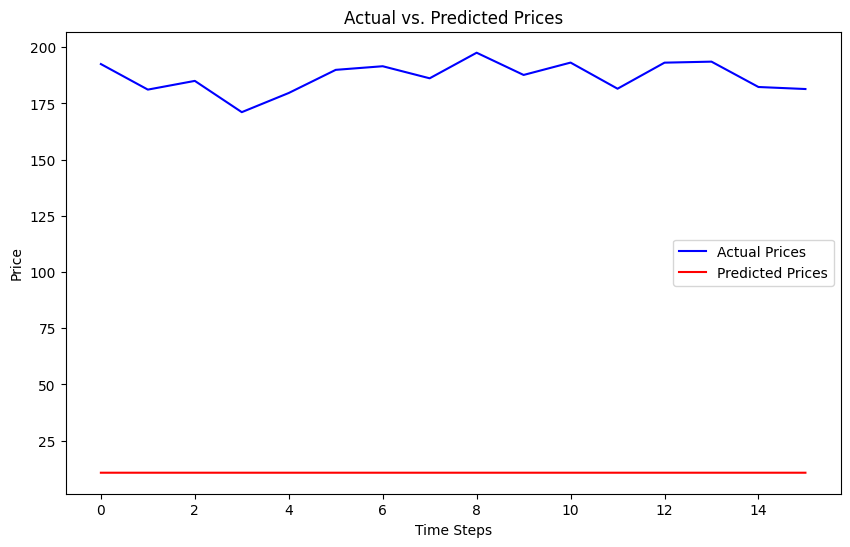

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have your data preprocessing steps to obtain closing_prices
closing_prices = data['4. close']

# Define function to create sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data)-seq_length-1):
        sequence = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append((sequence, target))
    return sequences

# Create sequences
sequences = create_sequences(closing_prices, seq_length=20)

# Split data into training and testing sets
train_data, test_data = train_test_split(sequences, test_size=0.2, shuffle=True)

# Prepare data for LSTM model
X_train = np.array([seq for seq, target in train_data])
y_train = np.array([target for seq, target in train_data])
X_test = np.array([seq for seq, target in test_data])
y_test = np.array([target for seq, target in test_data])

# Define and train LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32)

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    predicted_prices = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
    mae = mean_absolute_error(y_test, predicted_prices)
    return {'mae': mae, 'predicted_prices': predicted_prices}

# Call the evaluation function
evaluation_results = evaluate_model(model, X_test, y_test)
mae = evaluation_results['mae']
predicted_prices = evaluation_results['predicted_prices']

print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Plot actual vs. predicted prices for visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()


# **Step 1: Data Preprocessing**
**Load and Prepare Data:**

Load your time series data containing closing prices.

Handle any missing values or outliers in the dataset.

**Split Data into Sequences:**

Define a function to create sequences of historical data (seq_length) along with the next target value (next closing price).

In [ ]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length - 1):
        sequence = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((sequence, target))
    return sequences


# **Step 2: Model Development and Training**
**Define LSTM Model:**

Design an LSTM model architecture using TensorFlow and Keras.

In [ ]:
!pip install tensorflow


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

seq_length = 10

model = Sequential([
    LSTM(units=50, input_shape=(seq_length, 1)),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mse')


**Split Data into Training and Testing Sets:**

Use train_test_split to divide the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

sequences = create_sequences(closing_prices, seq_length)
train_data, test_data = train_test_split(sequences, test_size=0.2, shuffle=True)


**Train the LSTM Model:**

Fit the LSTM model on the training data.

In [ ]:
X_train = np.array([seq for seq, target in train_data])
y_train = np.array([target for seq, target in train_data])

model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32)


Epoch 1/100
3/3 [==============================] - 2s 9ms/step - loss: 34935.8984
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 34903.8828
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 34866.4375
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 34813.4805
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 34654.4336
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 34594.3789
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 34531.8750
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 34475.1250
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 34435.4805
Epoch 10/100
3/3 [==============================] - 0s 9ms/step - loss: 34406.8867
Epoch 11/100
3/3 [==============================] - 0s 8ms/step - loss: 34380.3203
Epoch 12/100
3/3 [==============================] - 0s 8ms/step - loss: 34349.7539
Epoch 13/100

# **Step 3: Model Evaluation and Improvement**
**Evaluate Model Performance:**

Implement an evaluation function to compute the Mean Absolute Error (MAE) and other relevant metrics.

In [ ]:
from sklearn.metrics import mean_absolute_error

def evaluate_model(model, X_test, y_test):
    predicted_prices = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
    mae = mean_absolute_error(y_test, predicted_prices)
    return mae


# **Hyperparameter Tuning:**


In [ ]:
# Module Installation
!pip install tensorflow
!pip install scikit-learn


Use Default Hyperparameters

In [ ]:
print(X_test.shape)

(16, 20)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define and train SVR model with default hyperparameters
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Evaluate the model on the test set
X_test_reduced = X_test[:, :10]
y_pred = model.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set (Reduced Features):", mse)


Mean Squared Error on Test Set (Reduced Features): 60.0667282230476


Manual Hyperparameter Tuning

In [ ]:
print(X_train.shape)
print(X_test.shape)

(71, 10)
(16, 20)


In [ ]:
print(model.n_features_in_)

10


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X_test_corrected = X_test[:, :10]

# Manually tune SVR hyperparameters and evaluate
model = SVR(C=10, gamma=0.1, kernel='rbf')
model.fit(X_train, y_train)

# Evaluate the manually tuned model on the test set
y_pred = model.predict(X_test_corrected)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set (Corrected):", mse)

Mean Squared Error on Test Set (Corrected): 52.92468257637539


Experiment with Different Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train and evaluate different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_corrected)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error on Test Set ({name}):", mse)


Mean Squared Error on Test Set (Linear Regression): 58.18038188876366
Mean Squared Error on Test Set (Decision Tree): 61.99401250000001
Mean Squared Error on Test Set (Random Forest): 54.72418554437477


Feature Engineering and Data Preprocessing

In [ ]:
print(X_test.shape)

(16, 20)


In [ ]:
print(X_train.shape[1])
print(X_test.shape[1])

10
20


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test[:,:10])

# Train SVR model on scaled data
model = SVR()
model.fit(X_train_scaled, y_train)

# Evaluate the model on the corrected test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set (Scaled Features):", mse)


Mean Squared Error on Test Set (Scaled Features): 26.12871635355842


Project Analysis and Visualization

In [ ]:
# List all variables in the current environment again
%whos

# Check if 'df' is in the list

Variable                 Type              Data/Info
----------------------------------------------------
DecisionTreeRegressor    ABCMeta           <class 'sklearn.tree._cla<...>s.DecisionTreeRegressor'>
Dense                    type              <class 'keras.src.layers.core.dense.Dense'>
LSTM                     type              <class 'keras.src.layers.rnn.lstm.LSTM'>
LinearRegression         ABCMeta           <class 'sklearn.linear_mo<...>._base.LinearRegression'>
RandomForestRegressor    ABCMeta           <class 'sklearn.ensemble.<...>t.RandomForestRegressor'>
SVR                      ABCMeta           <class 'sklearn.svm._classes.SVR'>
Sequential               type              <class 'keras.src.engine.sequential.Sequential'>
StandardScaler           type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
TimeSeries               type              <class 'alpha_vantage.timeseries.TimeSeries'>
X_test                   ndarray           16x20: 320 elems, type `f

In [ ]:
df = pd.read_csv('/content/california_housing_train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


<Axes: xlabel='median_income', ylabel='Count'>

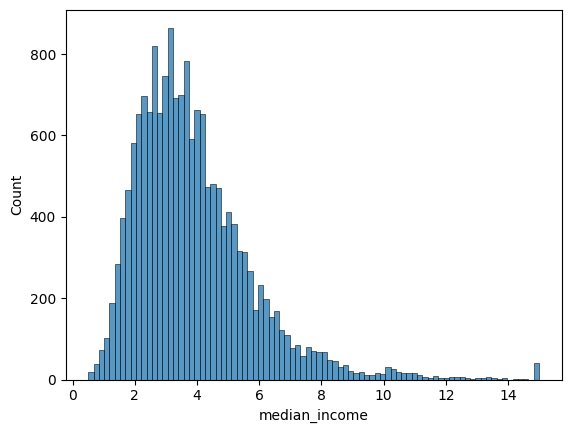

In [ ]:
# Print the first few rows of the data frame
df.head()

# Print information about the data frame
df.info()

# Print descriptive statistics of the data frame
df.describe()

# Visualize the distribution of a particular column
sns.histplot(df['median_income'])

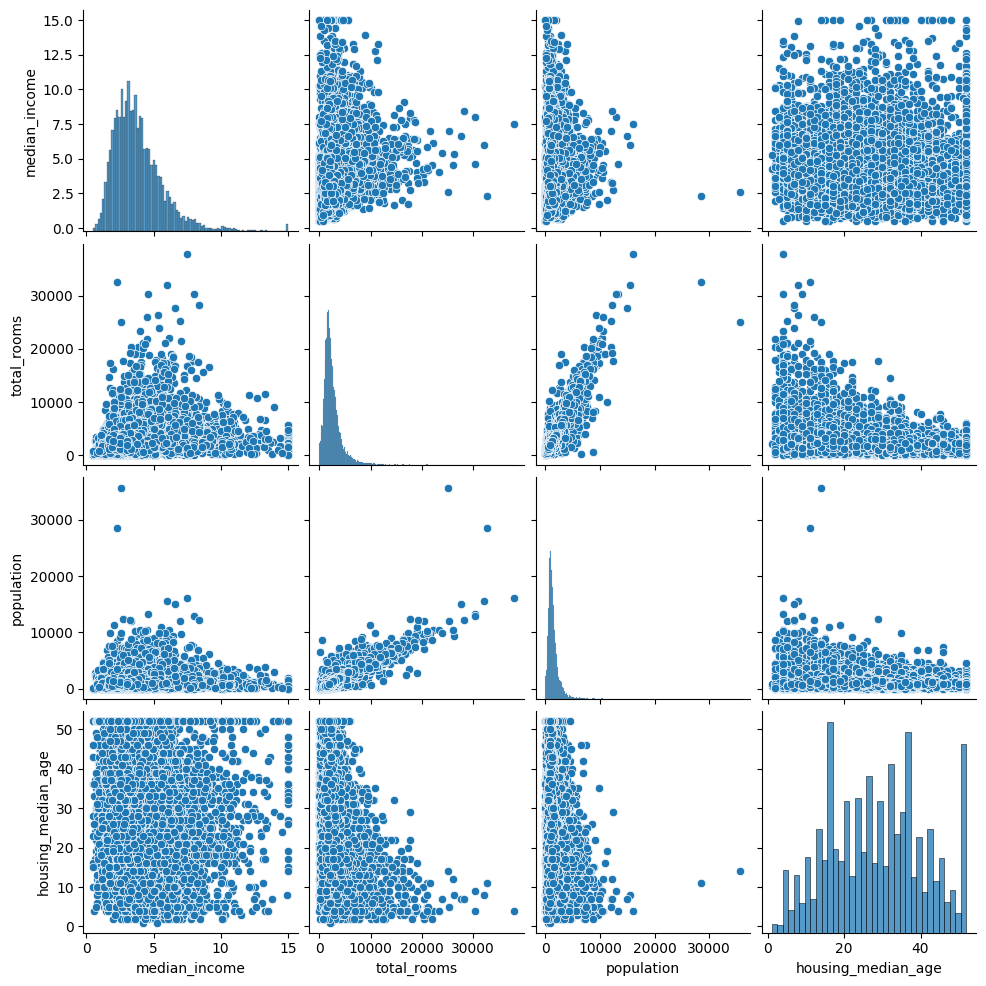

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of data visualization (replace with relevant analysis)
sns.pairplot(df[['median_income', 'total_rooms', 'population', 'housing_median_age']])
plt.show()

# Additional analysis and insights
# (Explore and analyze specific aspects of your dataset)


In [ ]:
!dir  # For Windows

import os
cwd = os.getcwd()
print(cwd)

import glob
file_list = glob.glob('*csv')  # Search for all CSV files in the current directory
print(file_list)



anscombe.json		     california_housing_train.csv  mnist_train_small.csv  sample_data
california_housing_test.csv  mnist_test.csv		   README.md
/content
['california_housing_train.csv', 'california_housing_test.csv', 'mnist_test.csv', 'mnist_train_small.csv']


In [ ]:
!dir

import os

# Get current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

# List all files and directories in the current directory
file_list = os.listdir()
print("Files and directories in current directory:")
print(file_list)

import glob

# Search for all CSV files in the current directory
csv_files = glob.glob('*.csv')
print("CSV Files in current directory:")
print(csv_files)


anscombe.json		     california_housing_train.csv  mnist_train_small.csv  sample_data
california_housing_test.csv  mnist_test.csv		   README.md
Current working directory: /content
Files and directories in current directory:
['.config', 'california_housing_train.csv', 'california_housing_test.csv', 'mnist_test.csv', 'mnist_train_small.csv', 'anscombe.json', 'README.md', 'sample_data']
CSV Files in current directory:
['california_housing_train.csv', 'california_housing_test.csv', 'mnist_test.csv', 'mnist_train_small.csv']


**performing EDA to get summary statistics of the dataset:**

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'california_housing_train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [ ]:
# Summary statistics
print(data.describe())

# Data types and missing values
print(data.info())

# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)


          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

# **Model Refinement:**
Adjusting Model Architecture

In [ ]:
print("Shape of X_train:", X_train.shape)


Shape of X_train: (71, 10)


In [ ]:
import numpy as np

# Assuming X_train is initially loaded with shape (71, 10)
print("Original shape of X_train:", X_train.shape)

# Reshape X_train to add the time steps dimension
time_steps = 1  # Adjust this based on your sequence length or desired time steps
features = X_train.shape[1]  # Number of features per time step

X_train_lstm = X_train.reshape(X_train.shape[0], time_steps, features)
print("Reshaped X_train for LSTM input:", X_train_lstm.shape)

# Define and train the initial LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(time_steps, features)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=0)


Original shape of X_train: (71, 10)
Reshaped X_train for LSTM input: (71, 1, 10)


To further refine and evaluate your LSTM model, you can follow these additional steps:

**Add Dropout Regularization:** To reduce overfitting, consider adding dropout layers between LSTM and Dense layers in your model.

**Evaluate the Model:** Use test data (if available) or perform cross-validation to evaluate the model's performance using appropriate metrics like mean squared error (MSE) or mean absolute error (MAE).

**Hyperparameter Tuning:** Experiment with different hyperparameters (e.g., number of LSTM units, dropout rate, batch size, epochs) to optimize model performance.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Define and train the LSTM model with dropout regularization
model = Sequential([
    LSTM(units=50, input_shape=(1, 10)),
    Dropout(0.2),  # Adding dropout regularization
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on training data
train_predictions = model.predict(X_train_lstm)
train_mse = mean_squared_error(y_train, train_predictions)
print("Train MSE:", train_mse)

# If available, evaluate the model on test data
# X_test_lstm = ...  # Prepare test data in the same format as X_train_lstm
# y_test = ...       # Prepare corresponding test labels
# test_predictions = model.predict(X_test_lstm)
# test_mse = mean_squared_error(y_test, test_predictions)
# print("Test MSE:", test_mse)


3/3 [==============================] - 0s 5ms/step
Train MSE: 32637.50452522829



**Increase Model Complexity:** Try increasing the number of LSTM units, adding more LSTM layers, or exploring different architectures (e.g., bidirectional LSTMs).

In [ ]:
model = Sequential([
    LSTM(units=100, input_shape=(1, 10), return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dense(1)
])


**Regularization:** Experiment with different dropout rates or add other regularization techniques (e.g., L2 regularization) to prevent overfitting.

In [ ]:
model = Sequential([
    LSTM(units=50, input_shape=(1, 10)),
    Dropout(0.5),  # Adjust dropout rate
    Dense(1)
])


In [ ]:
!pip install requests


In [ ]:
!pip install wget

In [ ]:
from alpha_vantage.timeseries import TimeSeries

# Replace with your API key
api_key = "5UKXMBI1FBATTABN"

# Define stock symbol and desired data range
symbol = "AAPL"  # Replace with the stock symbol you want to download

# Create a TimeSeries object
ts = TimeSeries(key=api_key, output_format='pandas')

# Get the daily adjusted data
data = ts.get_daily(symbol=symbol, outputsize='pandas')

# Get daily intraday data
data = ts.get_intraday(symbol=symbol, interval='1min', outputsize='pandas')

# Print the data
print(data)

(                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2024-04-15 19:59:00  172.625  172.650  172.59   172.600      823.0
2024-04-15 19:58:00  172.580  172.650  172.58   172.625      781.0
2024-04-15 19:57:00  172.600  172.600  172.52   172.600      259.0
2024-04-15 19:56:00  172.590  172.600  172.52   172.580     2040.0
2024-04-15 19:55:00  172.610  172.625  172.53   172.570     1600.0
...                      ...      ...     ...       ...        ...
2024-04-15 18:24:00  172.740  172.840  172.74   172.800      397.0
2024-04-15 18:23:00  172.740  172.840  172.74   172.790      252.0
2024-04-15 18:22:00  172.840  172.840  172.74   172.840      311.0
2024-04-15 18:21:00  172.800  172.800  172.74   172.790       48.0
2024-04-15 18:20:00  172.790  172.840  172.74   172.800      126.0

[100 rows x 5 columns], {'1. Information': 'Intraday (1min) open, high, low, close prices and volume', '2. Symbol': 'AAPL', '3.

# **Prediction and Analysis**


*   **Generate Predictions:** Use the trained model to generate predictions for future stock prices.
* **Visualize Results:** Visualize the predicted vs. actual stock prices to understand the model's performance.

*   **Error Analysis:** Analyze prediction errors and identify areas for improvement.






### **Generate Predictions**

In [ ]:
print(X_test.shape)

(16, 20)


In [ ]:
# Assuming X_test is your test data with shape (320,)
time_steps = 1  # Since each sample is a single time step
features = 10  # Number of features per time step expected by the model

# Calculate the number of samples based on the desired shape (16, 1, 10)
num_samples = X_test.size // (time_steps * features)

# Reshape X_test to match the expected input shape (num_samples, time_steps, features)
X_test_reshaped = X_test.reshape(num_samples, time_steps, features)

# Generate predictions using the reshaped test data
predictions = model.predict(X_test_reshaped)

# Print the predicted values
print("Predicted Prices:")
print(predictions)


1/1 [==============================] - 1s 544ms/step
Predicted Prices:
[[-0.13632095]
 [-0.12646602]
 [-0.13069771]
 [-0.0155658 ]
 [-0.02644201]
 [-0.10948694]
 [-0.07166202]
 [-0.11110511]
 [-0.03618056]
 [-0.12071192]
 [-0.08063778]
 [-0.12753698]
 [-0.08990048]
 [-0.07761598]
 [-0.07504594]
 [-0.1384474 ]
 [-0.12261274]
 [-0.09388795]
 [-0.0912576 ]
 [-0.06926064]
 [-0.00993955]
 [-0.08656977]
 [-0.12130439]
 [-0.0912576 ]
 [-0.13772433]
 [-0.04302339]
 [-0.11326706]
 [-0.02304247]
 [-0.10703705]
 [-0.08307502]
 [-0.11110523]
 [-0.02644211]]


### **Visualize Results**



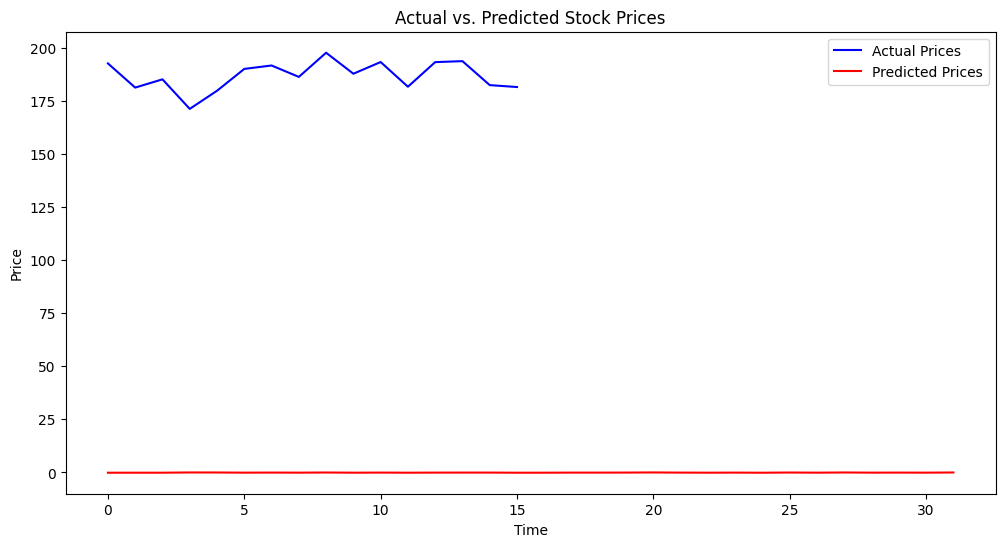

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the actual stock prices and 'predictions' contains the predicted prices
# Plotting the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')  # Plot actual prices in blue
plt.plot(predictions, label='Predicted Prices', color='red')  # Plot predicted prices in red
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


### **Error Analysis**

Length of y_test: 16
Length of predictions: 32
Mean Squared Error (MSE): 34947.88459533348
Mean Absolute Error (MAE): 186.82336397543548
Root Mean Squared Error (RMSE): 186.94353317334483


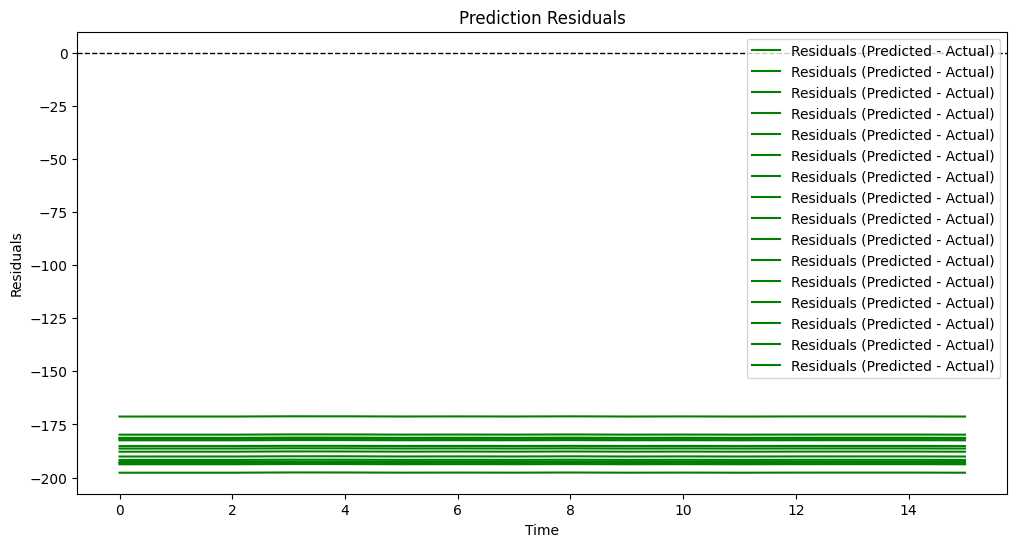

In [ ]:
# Check the lengths of y_test and predictions
print("Length of y_test:", len(y_test))
print("Length of predictions:", len(predictions))

# If the lengths are different, investigate the data sources and generation process
# Ensure that predictions align with the corresponding y_test data

# Example of aligning predictions with y_test
aligned_predictions = predictions[:len(y_test)]

# Compute error metrics with aligned predictions
mse = mean_squared_error(y_test, aligned_predictions)
mae = mean_absolute_error(y_test, aligned_predictions)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Print error metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting prediction errors (residuals)
residuals = aligned_predictions - y_test

plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals (Predicted - Actual)', color='green')
plt.axhline(0, linestyle='--', color='black', linewidth=1)
plt.title('Prediction Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


Mean Squared Error (MSE): 34947.88459533348
Mean Absolute Error (MAE): 186.82336397543548
Root Mean Squared Error (RMSE): 186.94353317334483


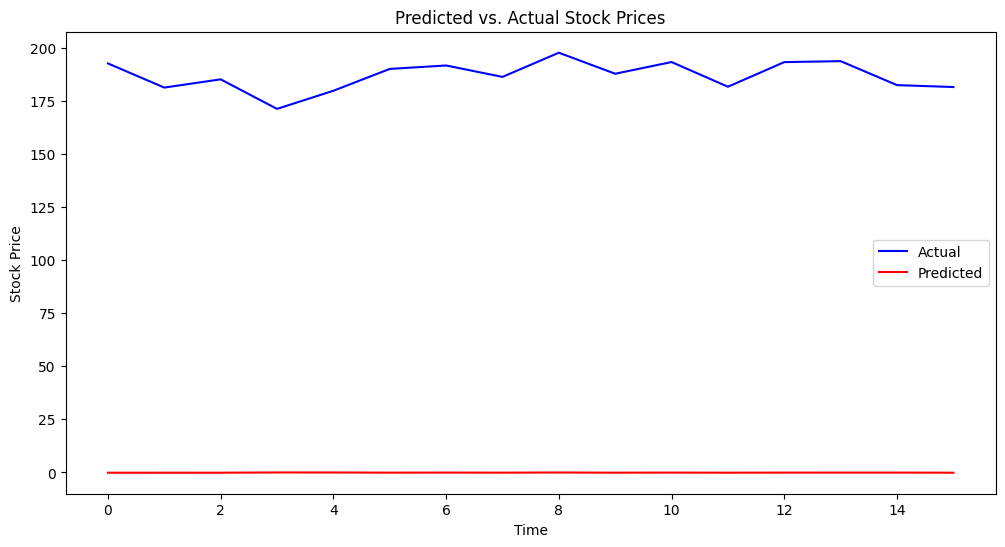

In [ ]:
# Align predictions with the length of y_test
aligned_predictions = predictions[:len(y_test)]

# Compute error metrics with aligned predictions
mse = mean_squared_error(y_test, aligned_predictions)
mae = mean_absolute_error(y_test, aligned_predictions)
rmse = np.sqrt(mse)

# Print error metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting prediction vs. actual
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(aligned_predictions, label='Predicted', color='red')
plt.title('Predicted vs. Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
import shutil
import os
# Create a zip file of the directory or files you want to download
shutil.make_archive('Stock_market', 'zip', r'C:\Users\lenovo\OneDrive\Desktop\MUJ\DS&ML project')

# Download the zip file to your local computer
files.download('Stock_market.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>